# Daub 5/3 integer-to-integer system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Импорт пользовательских функций.

In [2]:
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.user_functions import indx_even

In [3]:
#f = [1, -2, 6, 8]
f = np.random.randint(low=-10, high=11, size=8)

## Прямое преобразование

In [4]:
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [5]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

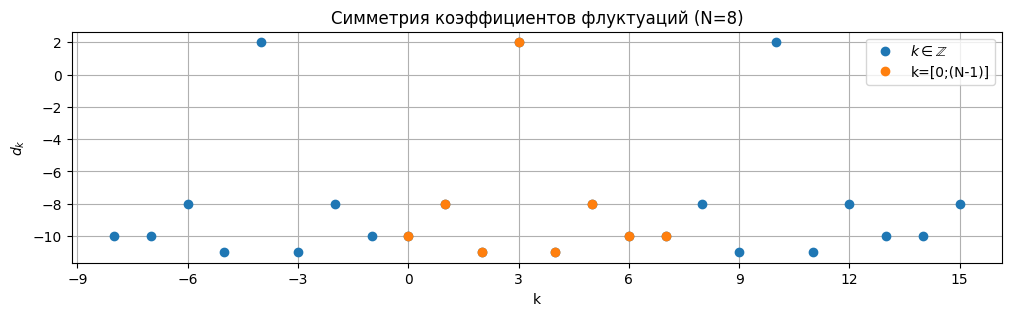

In [25]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
import matplotlib.ticker as ticker
'''
fig, ax = plt.subplots()
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()
'''

#user_figsize = (12, 6)
user_fontsize = 16

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

In [ ]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [8.25, 0.625, -4.25, -2.5]
d [0.5, 6.0, 13.0, 5.0]


## Обратное преобразование

In [ ]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print(f)
print(f_rec)
print(f-f_rec)

[ 8  4 -1  1 -9  5 -7 -2]
[8.0, 4.0, -1.0, 1.0, -9.0, 5.0, -7.0, -2.0]
[0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [ ]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)

Wavelet coefficients: [8.25, 0.625, -4.25, -2.5, 0.5, 6.0, 13.0, 5.0]
Reconstruction: [8.0, 4.0, -1.0, 1.0, -9.0, 5.0, -7.0, -2.0]
Original: [ 8  4 -1  1 -9  5 -7 -2]


In [ ]:
np.round(Mdir)

matrix([[ 1.,  0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  0.,  1.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  1.,  0.],
        [-0.,  1., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  1., -0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  1., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [ ]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[8.25, 0.625, -4.25, -2.5, 0.5, 6.0, 13.0, 5.0]
[8, 0, -5, -3, 1, 6, 13, 5]


Обратное преобразование, также по lifting-схеме.

In [ ]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(f_int)

[8.0, 4.0, -1.0, 1.0, -9.0, 5.0, -7.0, -2.0]
[8, 4, -1, 1, -9, 5, -7, -2]
